In [53]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("adilshamim8/startup-growth-and-investment-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kavishka Fernando\.cache\kagglehub\datasets\adilshamim8\startup-growth-and-investment-data\versions\1


In [54]:
dataset_folder = r"C:\Users\Kavishka Fernando\.cache\kagglehub\datasets\adilshamim8\startup-growth-and-investment-data\versions\1"

# List all files in the folder
csv_files = [f for f in os.listdir(dataset_folder) if f.endswith(".csv")]

# Ensure there's at least one CSV file
if len(csv_files) == 1:
    dataset_path = os.path.join(dataset_folder, csv_files[0])  # Select the first CSV file
    df = pd.read_csv(dataset_path)
    print("Dataset Loaded!")
    
    # Display dataset info
    print(df.info())
    print(df.head())  # Show first few rows
else:
    print("No CSV file found")

Dataset Loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB
None
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2 

In [55]:
print(df.isnull().sum())

# Check for duplicate rows
print(f"Duplicate Rows: {df.duplicated().sum()}")

Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64
Duplicate Rows: 0


In [56]:
print(df.dtypes)  # Check data types

Startup Name                object
Industry                    object
Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Country                     object
Year Founded                 int64
Growth Rate (%)            float64
dtype: object


In [57]:
print(df.isnull().sum())  # Check for missing values

Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64


In [58]:
df = pd.get_dummies(df, columns=["Industry", "Country"], drop_first=True) # One-hot encode categorical columns as these do not have ranking bias I chosed one hot encoding


In [59]:
# Summary statistics for numerical columns
print(df.describe())


       Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
count     5000.000000             5.000000e+03     5.000000e+03   
mean         5.491600             2.455567e+09     7.971059e+09   
std          2.913353             1.423787e+09     5.479487e+09   
min          1.000000             1.102610e+06     1.722547e+06   
25%          3.000000             1.221506e+09     3.598305e+09   
50%          6.000000             2.460634e+09     7.002304e+09   
75%          8.000000             3.639951e+09     1.147676e+10   
max         10.000000             4.999544e+09     2.470906e+10   

       Number of Investors  Year Founded  Growth Rate (%)  
count          5000.000000   5000.000000      5000.000000  
mean             25.542000   2011.544000       102.091732  
std              14.271838      6.885285        56.179781  
min               1.000000   2000.000000         5.060000  
25%              13.000000   2006.000000        52.815000  
50%              25.000000   2012.00

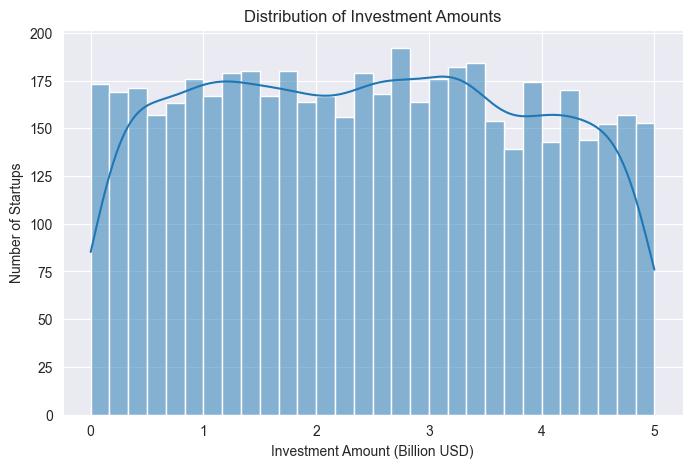

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert investment amount to billions
df["Investment Amount (Billion USD)"] = df["Investment Amount (USD)"] / 1e9

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df["Investment Amount (Billion USD)"], bins=30, kde=True)
plt.title("Distribution of Investment Amounts")
plt.xlabel("Investment Amount (Billion USD)")
plt.ylabel("Number of Startups")
plt.xticks(rotation=0)  # Keep labels horizontal for clarity
plt.show()




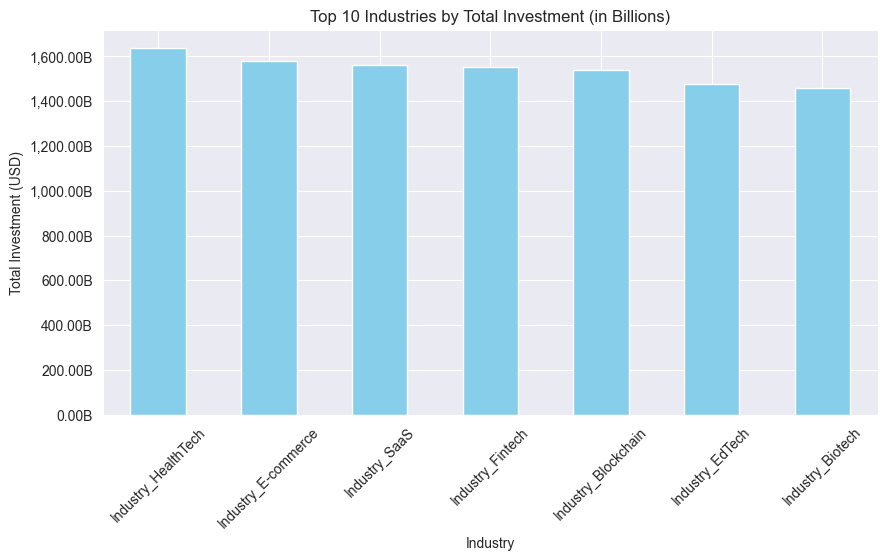

In [61]:
# Identify industry-related columns (after one-hot encoding)
industry_columns = [col for col in df.columns if col.startswith("Industry_")]

# Create a dictionary to store total funding for each industry
industry_funding = {}

for industry in industry_columns:
    total_funding = (df[industry] * df["Investment Amount (USD)"]).sum()  # Multiply and sum
    industry_funding[industry] = total_funding

# Convert to a Pandas Series and sort values
industry_funding = pd.Series(industry_funding).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Convert investment values to billions (M)
industry_funding_billions = industry_funding / 1e9  # Divide by 1 billion

plt.figure(figsize=(10, 5))
ax = industry_funding_billions.head(10).plot(kind="bar", color="skyblue")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.2f}B'))

plt.title("Top 10 Industries by Total Investment (in Billions)")
plt.xlabel("Industry")
plt.ylabel("Total Investment (USD)")
plt.xticks(rotation=45)
plt.show()


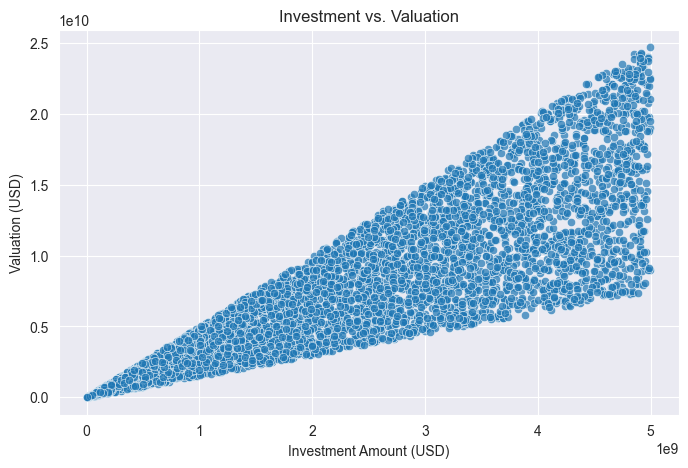

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Investment Amount (USD)"], y=df["Valuation (USD)"], alpha=0.7)
plt.title("Investment vs. Valuation")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.show()


In [63]:
print(df)


      Startup Name  Funding Rounds  Investment Amount (USD)  Valuation (USD)  \
0        Startup_1               8             1.335166e+09     6.621448e+09   
1        Startup_2               2             2.781498e+09     8.363214e+09   
2        Startup_3              10             3.309032e+09     1.548270e+10   
3        Startup_4               5             4.050196e+09     1.268253e+10   
4        Startup_5               9             1.645080e+09     6.887966e+09   
...            ...             ...                      ...              ...   
4995  Startup_4996               5             4.015771e+09     1.212346e+10   
4996  Startup_4997               2             3.619535e+09     1.107936e+10   
4997  Startup_4998              10             4.257640e+08     8.277586e+08   
4998  Startup_4999               4             4.220592e+08     1.895497e+09   
4999  Startup_5000               5             1.208767e+09     2.265635e+09   

      Number of Investors  Year Founded

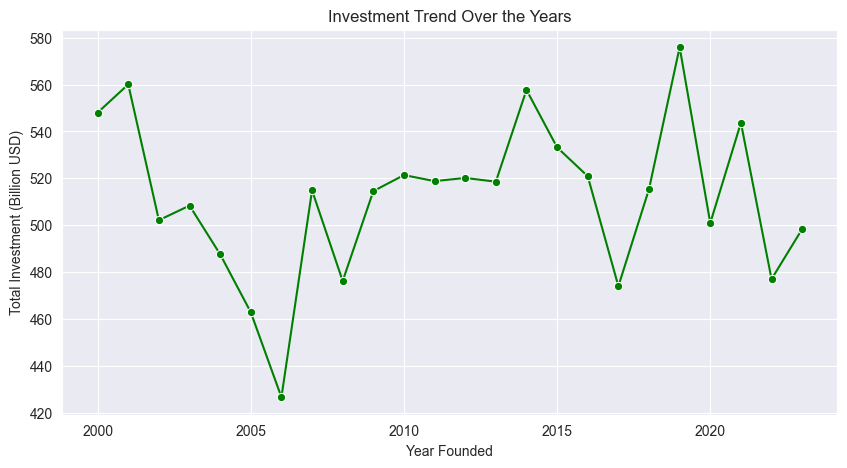

In [64]:
# Group by year and sum investments
yearly_funding = df.groupby("Year Founded")["Investment Amount (USD)"].sum()

# Convert to billions
yearly_funding = yearly_funding / 1e9

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker="o", color="green")
plt.title("Investment Trend Over the Years")
plt.xlabel("Year Founded")
plt.ylabel("Total Investment (Billion USD)")
plt.grid(True)
plt.show()


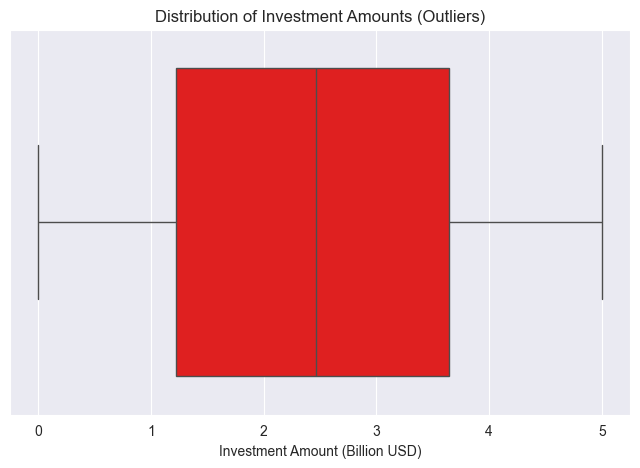

In [65]:
# Boxplot for investment amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Investment Amount (USD)"] / 1e9, color="red")
plt.title("Distribution of Investment Amounts (Outliers)")
plt.xlabel("Investment Amount (Billion USD)")
plt.show()


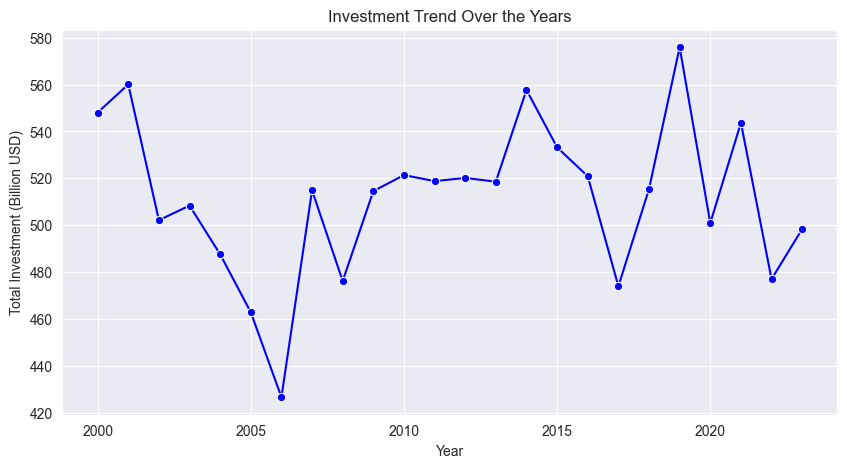

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and sum investments
yearly_funding = df.groupby("Year Founded")["Investment Amount (USD)"].sum()

# Convert to billions for better readability
yearly_funding = yearly_funding / 1e9

# Reset index for modeling
yearly_funding = yearly_funding.reset_index()
yearly_funding.columns = ["Year", "Total Investment (Billion USD)"]

# Visualize trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_funding["Year"], y=yearly_funding["Total Investment (Billion USD)"], marker="o", color="blue")
plt.title("Investment Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Investment (Billion USD)")
plt.grid(True)
plt.show()


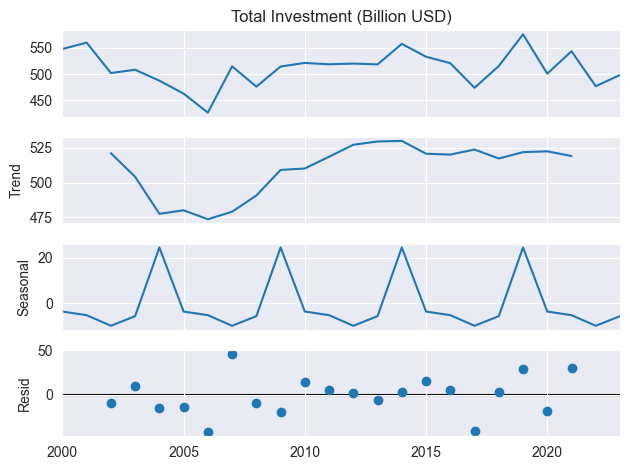

In [67]:
import statsmodels.api as sm

# Decompose time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(yearly_funding.set_index("Year")["Total Investment (Billion USD)"], model="additive", period=5)
decomposition.plot()
plt.show()


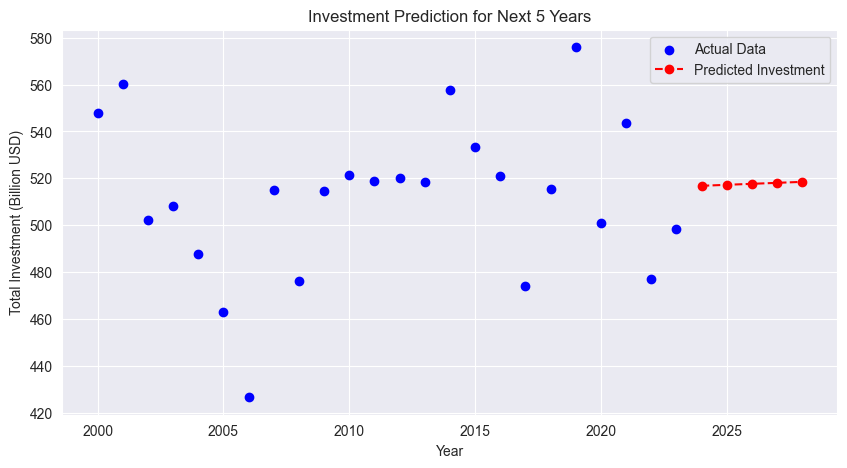

In [68]:
#Using linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = yearly_funding["Year"].values.reshape(-1, 1)  # Features (Years)
y = yearly_funding["Total Investment (Billion USD)"].values  # Target (Investment)

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
future_years = np.array(range(yearly_funding["Year"].max() + 1, yearly_funding["Year"].max() + 6)).reshape(-1, 1)
future_investment = model.predict(future_years)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Data", color="blue")
plt.plot(future_years, future_investment, label="Predicted Investment", color="red", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Investment (Billion USD)")
plt.title("Investment Prediction for Next 5 Years")
plt.legend()
plt.grid(True)
plt.show()


D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kavishka Fernando\AppData\Local\Tem

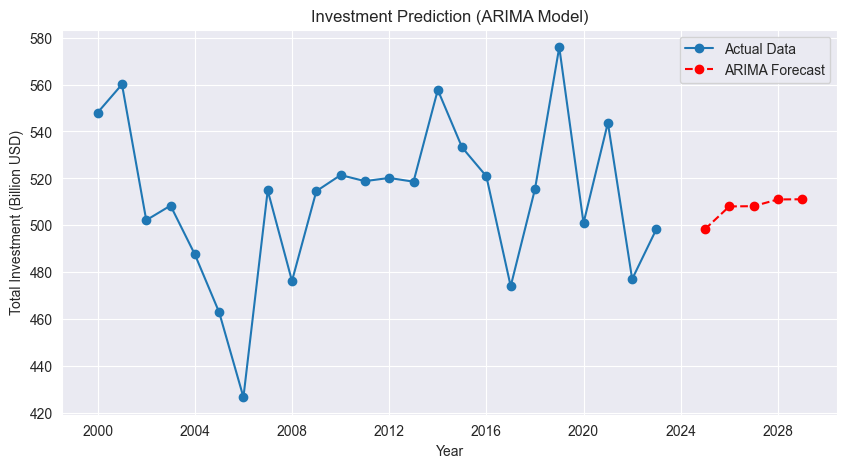

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Convert Year to datetime for better handling
yearly_funding["Year"] = pd.to_datetime(yearly_funding["Year"], format="%Y")

# Set index as Year
yearly_funding.set_index("Year", inplace=True)

# Fit ARIMA model (p=2, d=1, q=2 chosen based on tuning)
model = sm.tsa.ARIMA(yearly_funding["Total Investment (Billion USD)"], order=(2,1,2))
arima_result = model.fit()

# Forecast next 5 years
future_years = pd.date_range(start=yearly_funding.index[-1], periods=6, freq="Y")[1:]
forecast = arima_result.forecast(steps=5)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(yearly_funding.index, yearly_funding["Total Investment (Billion USD)"], label="Actual Data", marker="o")
plt.plot(future_years, forecast, label="ARIMA Forecast", color="red", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Investment (Billion USD)")
plt.title("Investment Prediction (ARIMA Model)")
plt.legend()
plt.grid(True)
plt.show()



D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
D:\4thYear\BIS\Assignment2\BIS_assignment\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Kavishka Fernando\AppData\Local\Temp\ipykernel_24364\3915133213.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=yearly_funding.index[-1], periods=6, freq="Y")[1:]


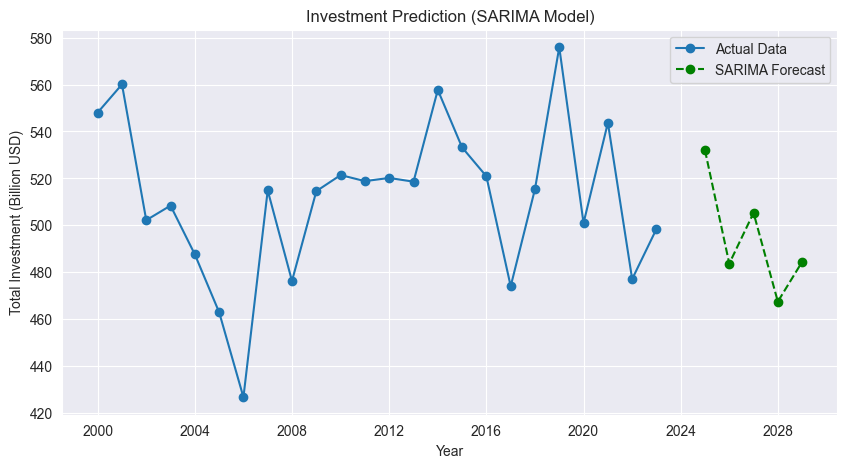

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (p=2, d=1, q=2, seasonal P=1, D=1, Q=1, m=5 assuming a 5-year cycle)
sarima_model = SARIMAX(yearly_funding["Total Investment (Billion USD)"], 
                       order=(2,1,2), 
                       seasonal_order=(1,1,1,5))
sarima_result = sarima_model.fit()

# Forecast next 5 years
future_years = pd.date_range(start=yearly_funding.index[-1], periods=6, freq="Y")[1:]
forecast_sarima = sarima_result.forecast(steps=5)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(yearly_funding.index, yearly_funding["Total Investment (Billion USD)"], label="Actual Data", marker="o")
plt.plot(future_years, forecast_sarima, label="SARIMA Forecast", color="green", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Investment (Billion USD)")
plt.title("Investment Prediction (SARIMA Model)")
plt.legend()
plt.grid(True)
plt.show()
